# Computational Statistics

## Estimation


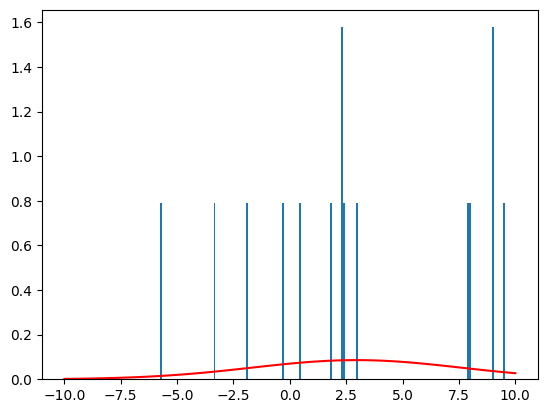

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import kde

# Creando una distribucion bimodal

x1 = norm.rvs(size=10,loc=0,scale=3)
x2 = norm.rvs(size=5,loc=8,scale=1)

x = np.r_[x1, x2]

# Calculo de la media y la desviacion estandar
xx = np.linspace(-10,10,100)
media = np.mean(x)
dev_std = np.std(x)
pp = norm.pdf(xx,media,dev_std)

plt.hist(x, bins=181, density=True)

plt.plot(xx,pp,'r')
plt.show()


<ipython-input-2-7f7cdd7c1f89>:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(x)


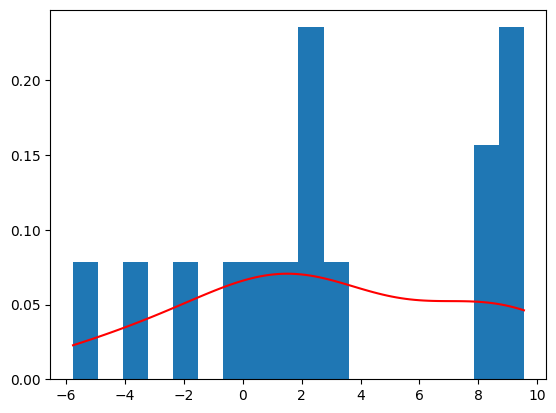

In [ ]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=18, density=True)
plt.plot(xgrid, density(xgrid), 'r-')
plt.show()

EJERICICIO: Plotea la estimacion para 3 diferentes anchos de banda [0.1, 0.2, 0.6]

<ipython-input-3-bf736756fccd>:1: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density1 = kde.gaussian_kde(x,0.1)
<ipython-input-3-bf736756fccd>:2: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density2 = kde.gaussian_kde(x,0.2)
<ipython-input-3-bf736756fccd>:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density6 = kde.gaussian_kde(x,0.6)


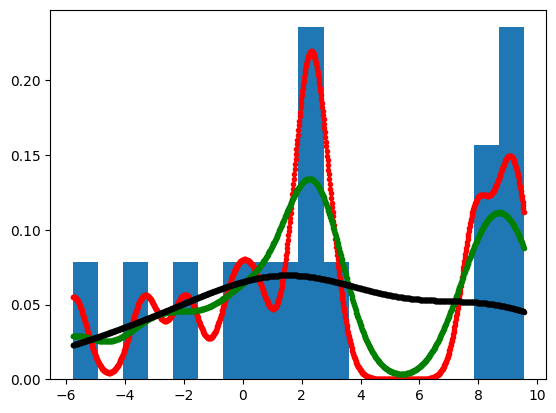

In [ ]:
density1 = kde.gaussian_kde(x,0.1)
density2 = kde.gaussian_kde(x,0.2)
density6 = kde.gaussian_kde(x,0.6)
xgrid = np.linspace(x.min(), x.max(), 1000)
plt.hist(x, bins=18, density=True)
plt.plot(xgrid, density1(xgrid), 'r.-')
plt.plot(xgrid, density2(xgrid), 'g.-')
plt.plot(xgrid, density6(xgrid), 'k.-')
plt.show()

## Mean (Media)

EJERCICIO: What is the mean? - ¿Que es la media?
R.- También conocida como promedio, es el valor que se obtiene al dividir la suma de un conglomerado de números entre la cantidad de ellos. Representa el punto de equilibrio de la distribución y está influida por los valores extremos.
Plotea la media

0.15516666666666667


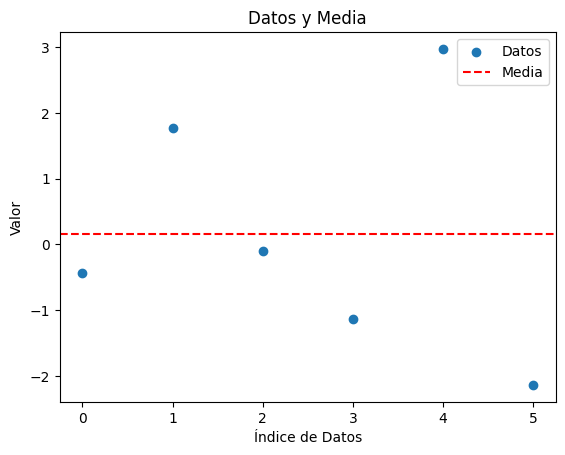

In [ ]:
x=np.array([-0.441, 1.774, -0.101, -1.138, 2.975, -2.138])
media = np.mean(x)
print(media)

# Crear un gráfico de dispersión con la línea de la media
plt.scatter(range(len(x)), x, label='Datos')
plt.axhline(y=media, color='red', linestyle='--', label='Media')

# Etiquetas y leyenda de la tabla
plt.xlabel('Índice de Datos')
plt.ylabel('Valor')
plt.title('Datos y Media')
plt.legend()

# Mostrando el gráfico
plt.show()


EJERCICIO: Plotea la mediana de los datos

-0.271


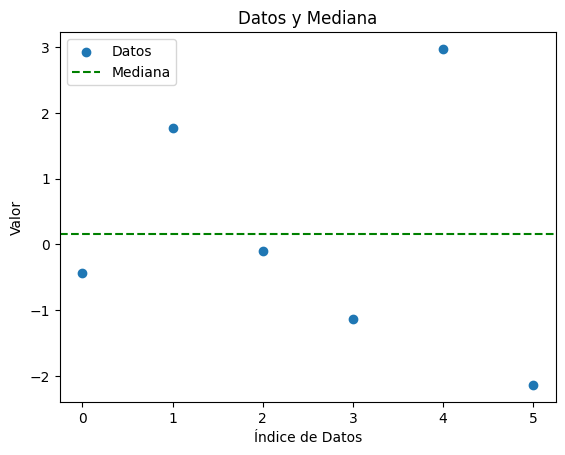

In [ ]:
x=np.array([-0.441, 1.774, -0.101, -1.138, 2.975, -2.138])
mediana = np.median(x)
print(mediana)

# Crear un gráfico de dispersión con la línea de la media
plt.scatter(range(len(x)), x, label='Datos')
plt.axhline(y=media, color='green', linestyle='--', label='Mediana')

# Etiquetas y leyenda de la tabla
plt.xlabel('Índice de Datos')
plt.ylabel('Valor')
plt.title('Datos y Mediana')
plt.legend()

# Mostrando el gráfico
plt.show()


EJERCICIO: Pruebe el MSE para diferentes números de pruebas (NTests) y números de muestras (NPoints)

In [ ]:
NNs= [20, 100, 1000, 10000, 100000]
mu=0.0
var=1.0
NPoints=100000
NTests=1000
for NPoints in NNs:
    err = 0
    for i in range(NTests):
        x = np.random.normal(mu, var, NPoints)
        err += (mu - x.mean())**2

    print('MSE: ', err/NTests, ', NPoints: ', NPoints)

MSE:  0.051609775445080656 , NPoints:  20
MSE:  0.00943812713429266 , NPoints:  100
MSE:  0.001015525995706376 , NPoints:  1000
MSE:  0.00010942542001408813 , NPoints:  10000
MSE:  1.0089033201518733e-05 , NPoints:  100000


EJERCICIO: Compare la media vs la mediana

In [ ]:
NNs= [20, 100, 1000, 10000, 100000]
for NPoints in NNs:
    err_mean = 0
    err_median = 0
    for i in range(NTests):
        x = np.random.normal(mu, var, NPoints)
        err_mean += (mu - x.mean())**2
        err_median += (mu - np.median(x))**2

    print('MSE mean: ', err_mean/NTests, 'MSE median: ', err_median/NTests,', NPoints: ', NPoints)

MSE mean:  0.05098711067051951 MSE median:  0.0741931888119102 , NPoints:  20
MSE mean:  0.010590507939219822 MSE median:  0.015769397320153 , NPoints:  100
MSE mean:  0.001067900735264122 MSE median:  0.0016828456810873494 , NPoints:  1000
MSE mean:  0.00010329016286380286 MSE median:  0.00016786571147231667 , NPoints:  10000
MSE mean:  9.833973715256473e-06 MSE median:  1.640669077818751e-05 , NPoints:  100000


##Error Estandar

EJERCICIO: Compara el error cuadrático MSE con el error
estandar

In [ ]:
NNs= [20, 100, 1000, 10000, 100000]
for NPoints in NNs:
    err_mean = 0
    err_std = 0
    for i in range(NTests):
        x = np.random.normal(mu, var, NPoints)
        err_mean += (mu - x.mean())**2
        err_std += np.std(x)/np.sqrt(NPoints)

    print('MSE mean: ', np.sqrt(err_mean/NTests), 'error estandar: ', err_std/NTests,', NPoints: ', NPoints)

MSE mean:  0.21501953808827537 error estandar:  0.21638396306995802 , NPoints:  20
MSE mean:  0.10306776506797588 error estandar:  0.09956091642294475 , NPoints:  100
MSE mean:  0.031053041552914964 error estandar:  0.03161662846147632 , NPoints:  1000
MSE mean:  0.009679466240105829 error estandar:  0.009998270440624447 , NPoints:  10000
MSE mean:  0.003122231036964118 error estandar:  0.003162183390478332 , NPoints:  100000


EJERCICIO: calcule la varianza de la muestra para el ejercicio anterior.

In [ ]:
NNs= [20, 100, 1000, 10000, 100000, 1000000]
for NPoints in NNs:
    vars = 0
    for i in range(NTests):
        x = np.random.normal(mu, var, NPoints)
        vars += np.var(x)

    print('Var: ', vars/NTests, ', NPoints: ', NPoints)

Var:  0.94939166042169 , NPoints:  20
Var:  0.9958205259747379 , NPoints:  100
Var:  0.9982475889742194 , NPoints:  1000
Var:  1.0003079231004484 , NPoints:  10000
Var:  1.0000861732556319 , NPoints:  100000
Var:  1.0000773445058728 , NPoints:  1000000


EJERCICIO: Estandarice los siguientes datos y trace el histograma de los datos originales y estandarizados

Text(0.5, 1.0, 'z')

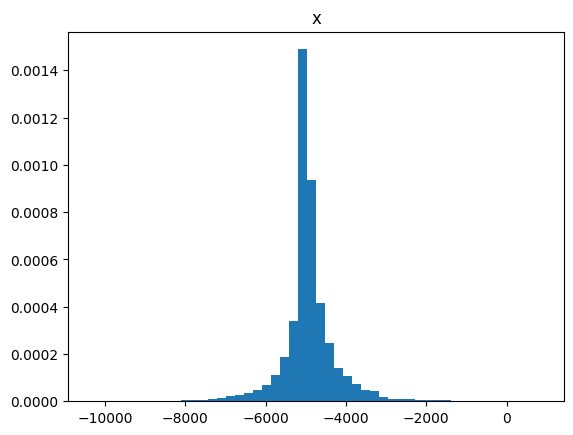

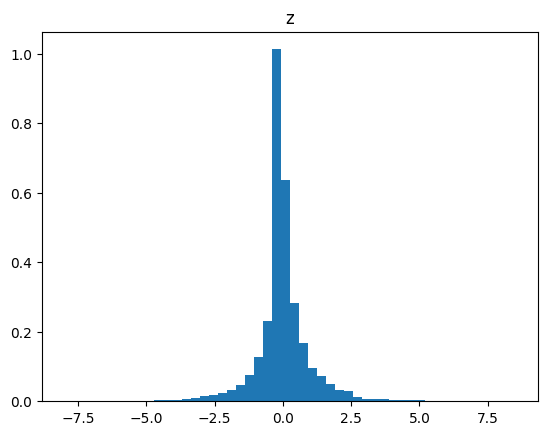

In [ ]:
x = np.sign(np.random.normal(5, 20, 10000))*(np.random.normal(0, 20, 10000))**2-5000

z = (x-np.mean(x))/np.std(x)

plt.figure()
plt.hist(x,50,density='True')
plt.title('x')

plt.figure()
plt.hist(z,50,density='True')
plt.title('z')

EJERCICIO: Cargue el cuarteto de Anscombe (archivo anscombe.csv del directorio de archivos) y obtenga la covarianza, la correlación de Pearson y la correlación de rango de Spearman de cada par

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr

# Cargando y viendo los primeros datos
data = pd.read_csv('anscombe.csv')
print(data.head())

# Obteneniendo las columnas con los datos
x1, y1, x2, y2, x3, y3, x4, y4 = data['x1'], data['y1'], data['x2'], data['y2'], data['x3'], data['y3'], data['x4'], data['y4']

# Calculando la covarianza
cov= np.cov([x1, y1, x2, y2, x3, y3, x4, y4])
print("Covarianza:")
print(cov)

# Calculando la correlación de Pearson
pearson_corr= np.corrcoef([x1, y1, x2, y2, x3, y3, x4, y4])
print("\nCorrelación de Pearson:")
print(pearson_corr)

# Calculando la correlación de rango de Spearman
spearman_corr, _ = spearmanr(data)
print("\nCorrelación de Spearman:")
print(spearman_corr)

   x1  x2  x3  x4    y1    y2     y3    y4
0  10  10  10   8  8.04  9.14   7.46  6.58
1   8   8   8   8  6.95  8.14   6.77  5.76
2  13  13  13   8  7.58  8.74  12.74  7.71
3   9   9   9   8  8.81  8.77   7.11  8.84
4  11  11  11   8  8.33  9.26   7.81  8.47
Covarianza:
[[11.          5.501      11.          5.5        11.          5.497
  -5.5        -2.115     ]
 [ 5.501       4.12726909  5.501       3.09560909  5.501       1.93343
  -3.565      -2.01773091]
 [11.          5.501      11.          5.5        11.          5.497
  -5.5        -2.115     ]
 [ 5.5         3.09560909  5.5         4.12762909  5.5         2.42524
  -4.841      -1.97235091]
 [11.          5.501      11.          5.5        11.          5.497
  -5.5        -2.115     ]
 [ 5.497       1.93343     5.497       2.42524     5.497       4.12262
  -2.321      -0.641     ]
 [-5.5        -3.565      -5.5        -4.841      -5.5        -2.321
  11.          5.499     ]
 [-2.115      -2.01773091 -2.115      -1.97235091 -2